In [ ]:
# Логистическая регрессия датасета "Iris"

In [1]:
# импортируем модули для работы
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import pylab
import pylab as plt
import scipy
%matplotlib inline

In [9]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

In [18]:
class LogRegression:
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
        
    def fit(self, X, y):
        X = np.hstack([np.ones((len(X), 1)), X])
        self.theta = np.zeros(X.shape[1])
        for i in range(self.n_iter):
            z = X @ self.theta
            p =  1 / (1 + np.exp(-z))
            gradient = (X.T @ (p - y)) / len(y)
            self.theta -= self.lr * gradient

        
    def predict(self, X):
        X = np.hstack([np.ones((len(X), 1)), X])
        pred = (1 / (1 + np.exp(-(X @ self.theta))))
        return [1 if i > 0.5 else 0 for i in pred]

    def p_tryout(self, X):
      tryout = sigmoid(X)
      scipy.special.expit(tryout, out=tryout)
      if tryout.ndim == 1:
          return np.vstack([1 - tryout, tryout]).T
      else:
          tryout /= tryout.sum(axis=1).reshape((tryout.shape[0], -1))
          return tryout

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [20]:
model = LogRegression()
%time model.fit(X_train, Y_train)

CPU times: user 2.74 ms, sys: 0 ns, total: 2.74 ms
Wall time: 2.78 ms


In [21]:
y_pred = model.predict(X_test)
y_pred

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1]

In [22]:
model.theta

array([-0.01357655,  0.13971783, -0.19136099])

In [23]:
accuracy_score(Y_test, y_pred)

0.6363636363636364

In [25]:
def sigmoid(x):
    sigmoid_return = 1 / (1 + np.exp(-x))
    return sigmoid_return

In [24]:
x = model.theta
y = pylab.linspace(0,1,10)

Text(0, 0.5, 'Y Axis')

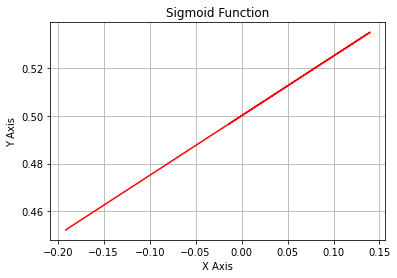

In [26]:
pylab.plot(x, sigmoid(x), 'r')
pylab.grid()
pylab.title('Sigmoid Function')
pylab.xlabel('X Axis')
pylab.ylabel('Y Axis')

Проверка:

In [27]:
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5, random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
model = LogRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.761